# Project 4

## load code

In [1]:
import pandas as pd
import altair as alt
import numpy as np 
import datadotworld as dw

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

?????? fix def of recal and precison ????????
Recall is all the data that the model found. The recall accuracy for the false values the model found is 85%. For the true values the value is 94%. 

Precision is the amount of relavent data the model found. The precision accuracy for the false values the model found is 89%. The precision accuracy for the true values is 91%. For the most part the model was accurate. 

In [6]:
denver_url = 'https://raw.githubusercontent.com/byuidatascience/data4dwellings/master/data-raw/dwellings_denver/dwellings_denver.csv'
dwellings_denver = pd.read_csv(denver_url)

In [3]:
ml_url = 'https://raw.githubusercontent.com/byuidatascience/data4dwellings/master/data-raw/dwellings_ml/dwellings_ml.csv'
dwellings_ml = pd.read_csv(ml_url)
# has before1980 column 

## question 1

In [7]:
dwellings_denver['before1980'] = dwellings_denver.yrbuilt < 1980
averages = (dwellings_denver.groupby('before1980')
            .agg(avg_sprice = ('sprice', np.mean),
                avg_netprice = ('netprice', np.mean),
                avg_numbaths = ('numbaths', np.mean)
                )    
            )
print(averages.to_markdown())

| before1980   |       avg_sprice |     avg_netprice |   avg_numbaths |
|:-------------|-----------------:|-----------------:|---------------:|
| False        |      1.08763e+06 |      1.08643e+06 |        2.98173 |
| True         | 246300           | 244884           |        1.97311 |


In [14]:
averages_all = (dwellings_denver.groupby('before1980')
            .agg(avg_nbhd = ('nbhd', np.mean),
                avg_livearea = ('livearea', np.mean),
                avg_finbsmnt = ('finbsmnt', np.mean),
                avg_basement = ('basement', np.mean),
                avg_totunits = ('totunits', np.mean),
                avg_stories = ('stories', np.mean),
                avg_nocars = ('nocars', np.mean),
                avg_floorlvl = ('floorlvl', np.mean),
                avg_numbdrm = ('numbdrm', np.mean),
                avg_numbaths = ('numbaths', np.mean),
                avg_sprice = ('sprice', np.mean),
                avg_netprice = ('netprice', np.mean),
                avg_deduct = ('deduct', np.mean),
                avg_tasp = ('tasp', np.mean)                
                )    
            )
print(averages_all.to_markdown())

| before1980   |   avg_nbhd |   avg_livearea |   avg_finbsmnt |   avg_basement |   avg_totunits |   avg_stories |   avg_nocars |   avg_floorlvl |   avg_numbdrm |   avg_numbaths |       avg_sprice |     avg_netprice |   avg_deduct |         avg_tasp |
|:-------------|-----------:|---------------:|---------------:|---------------:|---------------:|--------------:|-------------:|---------------:|--------------:|---------------:|-----------------:|-----------------:|-------------:|-----------------:|
| False        |    301.825 |        1878.92 |        300.081 |        570.323 |       0.999302 |       1.76437 |      1.56667 |        7.15064 |       2.63021 |        2.98173 |      1.08763e+06 |      1.08643e+06 |      1205.48 |      1.09088e+06 |
| True         |    449.003 |        1289.84 |        348.776 |        497.001 |       1.02996  |       1.21307 |      1.2401  |        3.41595 |       2.45715 |        1.97311 | 246300           | 244884           |      1415.85 | 247491         

best features:
- sprice
- netprice
- numbaths

other:
- avg_condition = ('condition', np.mean)
- avg_quality = ('quality', np.mean)
- avg_arcstyle = ('arcstyle', np.mean)

In [5]:
beforeyr1980 = dwellings_denver.yrbuilt <= 1980

In [6]:
# dwellings_denver['year'] = dwellings_denver.yrbuilt < 1980
year_vs_arcstyle = (dwellings_denver
            .groupby('arcstyle')
            .agg(num_built = ('yrbuilt', np.count_nonzero))
            # .assign(b1980 = lambda x: x.year <= 1980)
            .reset_index()
            )
year_vs_arcstyle

,arcstyle,num_built
0,BI-LEVEL,187
1,CONVERSIONS,127
2,END UNIT,4477
3,MIDDLE UNIT,3066
4,ONE AND HALF-STORY,829
5,ONE-STORY,8608
6,SPLIT LEVEL,38
7,THREE-STORY,37
8,TRI-LEVEL,271
9,TRI-LEVEL WITH BASEMENT,321


In [7]:
(alt.Chart(year_vs_arcstyle)
    .mark_bar()
    .encode(x=alt.X('arcstyle', scale=alt.Scale(zero=False)),
            y='num_built') 
)

alt.Chart(...)

In [8]:
(alt.Chart(dwellings_denver)
    .mark_circle()
    .encode(x=alt.X('yrbuilt', scale=alt.Scale(zero=False), axis = alt.Axis(format = 'd', title = 'Year')), 
            y='netprice', 
            )
    .properties(
        height = 200,
        width = 300,
        title = {'text': 'Netprice', 'subtitle': 'Netprice of houses by year.'}
    )
)

alt.Chart(...)

In [9]:
(alt.Chart(dwellings_denver)
    .mark_circle()
    .encode(x=alt.X('yrbuilt', scale=alt.Scale(zero=False), axis = alt.Axis(format = 'd', title = 'Year')), 
            y='sprice', 
            )
    .properties(
        height = 200,
        width = 300,
        title = {'text': 'Sprice', 'subtitle': 'Sprice of houses by year.'}
    )
)

alt.Chart(...)

In [10]:
year_vs_bathrooms = (dwellings_denver.groupby('yrbuilt')
            .agg(avg_baths = ('numbaths', np.mean))
            .reset_index()
            )

(alt.Chart(year_vs_bathrooms)
    .mark_circle()
    .encode(x=alt.X('yrbuilt', scale=alt.Scale(zero=False), axis = alt.Axis(format = 'd', title = 'Year')), 
            y='avg_baths', 
            )
    .properties(
        height = 200,
        width = 300,
        title = {'text': 'Average Number of Baths', 'subtitle': 'Average number of bathrooms in house by year.'}
    )
)

alt.Chart(...)

## Question 2

### Organize Data

In [11]:
# features = dwellings_ml.filter(['sprice', 'numbaths', 'netprice'])
features = dwellings_ml.drop(columns=['before1980', 'yrbuilt', 'parcel'])

targets = dwellings_ml.before1980

In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    features, 
    targets, 
    test_size = .3, 
    random_state = 24601) # like setting seed in r

### Desison Tree

In [13]:
# create a classification model
classifier_GB = GradientBoostingClassifier()

# train the model
classifier_GB.fit(x_train, y_train)

# use your model to make predictions!
y_predicted = classifier_GB.predict(x_test)

# test how accurate those predictions are
metrics.accuracy_score(y_test, y_predicted)

0.9045679371544952

## Question 3

### features importance

In [24]:
features_df = pd.DataFrame({'features':features.columns, 'importance':classifier_GB.feature_importances_})
top10 = features_df[features_df['importance'] >= 0.02].sort_values('importance', ascending=False)
top10

,features,importance
37,arcstyle_ONE-STORY,0.329334
25,gartype_Att,0.148840
22,quality_C,0.136847
8,numbaths,0.059694
5,stories,0.059578
15,condition_AVG,0.043597
0,abstrprd,0.034802
1,livearea,0.030062
3,basement,0.028569
46,status_I,0.021708


In [26]:
features_imp_chart = (alt.Chart(top10).mark_bar().encode(x='importance', y='features'))
features_imp_chart

alt.Chart(...)

## Question 4

### model matrix

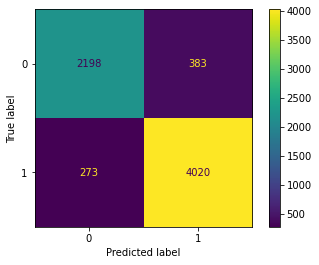

In [14]:
metrics.plot_confusion_matrix(classifier_GB, x_test, y_test)

In [15]:
print(metrics.classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      2581
           1       0.91      0.94      0.92      4293

    accuracy                           0.90      6874
   macro avg       0.90      0.89      0.90      6874
weighted avg       0.90      0.90      0.90      6874

